In [1]:
import audimg as A

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/base/hdf5.py:40: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  import h5py.highlevel  # >= 2.8.0, https://github.com/h5py/h5py/issues/1063
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/testing/tools.py:81: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import skipif


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
A.pl.rcParams['figure.figsize']=(12,6)

<h2>Load pre-computed per-subject and per-task results, calculate group results</h2>

In [3]:
# Load subj, task partial result files (outputs from cluster jobs)
subj_res = A.load_all_subj_res_from_parts()

In [4]:
# Calculate group result (ttest / wilcoxon) from within-subject classification (WSC) means
group_res=A.calc_group_results(subj_res)

pch-height lh-precentral H TT:( 1.3, 0.116376) WX:(13.0, 0.255329)
pch-height lh-precentral I TT:(-1.6, 0.924042) WX:( 8.0, 0.155218)
pch-height rh-precentral H TT:( 1.0, 0.177061) WX:( 2.0, 0.592980)
pch-height rh-precentral I TT:(-3.2, 0.994940) WX:( 0.0, nan)
pch-height lh-precuneus H TT:( 0.5, 0.305799) WX:(15.0, 0.672527)
pch-height lh-precuneus I TT:(-0.3, 0.615910) WX:(20.0, 0.762606)
pch-height rh-precuneus H TT:( 1.0, 0.173946) WX:( 3.0, 0.465209)
pch-height rh-precuneus I TT:( 1.0, 0.170447) WX:( 0.0, 0.317311)
pch-height lh-rostralanteriorcingulate H TT:(-5.2, 0.999805) WX:( 0.0, 0.006170)
pch-height lh-rostralanteriorcingulate I TT:( 0.9, 0.184984) WX:(11.0, 0.323405)
pch-height rh-rostralanteriorcingulate H TT:( 1.1, 0.155698) WX:( 0.0, 0.108809)
pch-height rh-rostralanteriorcingulate I TT:(-1.4, 0.903936) WX:( 0.0, 0.179712)
pch-height lh-rostralmiddlefrontal H TT:(-0.9, 0.816285) WX:(19.0, 0.200067)
pch-height lh-rostralmiddlefrontal I TT:( 0.7, 0.246124) WX:(22.0, 0.569

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-pack

 TT:(-0.0, 0.500000) WX:(13.0, 0.865295)
pch-height rh-cuneus H TT:(-0.7, 0.747074) WX:( 5.0, 0.479500)
pch-height rh-cuneus I TT:(-0.9, 0.798999) WX:( 4.0, 0.343028)
pch-height lh-entorhinal H TT:( 0.2, 0.428921) WX:(10.0, 0.915345)
pch-height lh-entorhinal I TT:( 1.5, 0.080508) WX:(12.0, 0.205389)
pch-height rh-entorhinal H TT:( 0.0, 0.500000) WX:(10.5, 1.000000)
pch-height rh-entorhinal I TT:(-0.8, 0.784211) WX:( 3.0, 0.449692)
pch-height lh-fusiform H TT:( 0.8, 0.230669) WX:(24.0, 0.414216)
pch-height lh-fusiform I TT:(-1.7, 0.939512) WX:(12.0, 0.107046)
pch-height rh-fusiform H TT:( 0.9, 0.201001) WX:( 4.5, 0.416366)
pch-height rh-fusiform I TT:( 0.5, 0.329735) WX:( 3.0, 1.000000)
pch-height lh-inferiorparietal H TT:(-2.6, 0.986089) WX:( 8.0, 0.043452)
pch-height lh-inferiorparietal I TT:( 0.7, 0.236273) WX:(24.0, 0.419430)
pch-height rh-inferiorparietal H TT:( 0.4, 0.338041) WX:( 2.0, 0.592980)
pch-height rh-inferiorparietal I TT:( 1.0, 0.170447) WX:( 0.0, 0.317311)
pch-height lh

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:( 0.5, 0.327451) WX:(29.5, 0.753286)
pch-height rh-posteriorcingulate H TT:( 1.0, 0.177061) WX:( 2.0, 0.592980)
pch-height rh-posteriorcingulate I TT:(-3.2, 0.994940) WX:( 0.0, nan)
timbre lh-precentral H TT:( 0.9, 0.187806) WX:(21.5, 0.306078)
timbre lh-precentral I TT:(-1.0, 0.837987) WX:(15.0, 0.201741)
timbre rh-precentral H TT:( 0.5, 0.305271) WX:( 2.0, 0.592980)
timbre rh-precentral I TT:( nan, nan) WX:( 0.0, nan)
timbre lh-precuneus H TT:( 1.2, 0.120769) WX:(21.0, 0.285527)
timbre lh-precuneus I TT:(-2.1, 0.971305) WX:( 4.5, 0.032051)
timbre rh-precuneus H TT:( 0.5, 0.313590) WX:( 4.0, 0.715001)
timbre rh-precuneus I TT:( 1.0, 0.170447) WX:( 0.0, 0.317311)
timbre lh-rostralanteriorcingulate H TT:(-2.0, 0.963805) WX:(11.0, 0.092389)
timbre lh-rostralanteriorcingulate I TT:(-0.3, 0.619958) WX:(32.0, 0.928907)
timbre rh-rostralanteriorcingulate H TT:( 1.3, 0.118241) WX:( 1.0, 0.285049)
timbre rh-rostralanteriorcingulate I TT:(-1.5, 0.915109) WX:( 0.0, 0.179712)
timbre lh-rostra

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/misc/stats.py:180: RuntimeWarning: invalid value encountered in divide
  t = np.divide(d, denom)
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size t

 TT:(-0.1, 0.554440) WX:(33.0, 1.000000)
timbre lh-fusiform I TT:(-1.5, 0.918848) WX:(19.0, 0.212997)
timbre rh-fusiform H TT:( 0.6, 0.275527) WX:( 6.0, 0.685830)
timbre rh-fusiform I TT:( 0.7, 0.241113) WX:( 3.0, 1.000000)
timbre lh-inferiorparietal H TT:(-1.5, 0.912082) WX:(18.5, 0.196661)
timbre lh-inferiorparietal I TT:( 0.3, 0.389516) WX:(25.5, 0.504247)
timbre rh-inferiorparietal H TT:( 0.6, 0.285867) WX:( 4.0, 0.715001)
timbre rh-inferiorparietal I TT:( 1.4, 0.092440) WX:( 0.0, 0.179712)
timbre lh-inferiortemporal H TT:(-1.2, 0.875762) WX:(22.0, 0.327586)
timbre lh-inferiortemporal I TT:(-0.8, 0.783144) WX:(24.0, 0.421061)
timbre rh-inferiortemporal H TT:(-0.5, 0.669987) WX:( 2.0, 0.592980)
timbre rh-inferiortemporal I TT:( nan, nan) WX:( 0.0, nan)
timbre lh-isthmuscingulate H TT:( 0.1, 0.443664) WX:(20.5, 0.812542)
timbre lh-isthmuscingulate I TT:(-0.7, 0.748429) WX:(22.5, 0.349814)
timbre rh-isthmuscingulate H TT:( 0.5, 0.305271) WX:( 2.0, 0.592980)
timbre rh-isthmuscingulate 

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:(-0.8, 0.765319) WX:(24.5, 0.449355)
timbre lh-parsorbitalis I TT:(-0.7, 0.752542) WX:(21.0, 0.505962)
timbre rh-parsorbitalis H TT:( 0.5, 0.305271) WX:( 2.0, 0.592980)
timbre rh-parsorbitalis I TT:( nan, nan) WX:( 0.0, nan)
timbre lh-parstriangularis H TT:( 2.5, 0.016126) WX:( 9.5, 0.036578)
timbre lh-parstriangularis I TT:( 0.8, 0.234095) WX:(25.5, 0.838360)
timbre rh-parstriangularis H TT:( 0.5, 0.305271) WX:( 2.0, 0.592980)
timbre rh-parstriangularis I TT:( nan, nan) WX:( 0.0, nan)
timbre lh-pericalcarine H TT:( 1.5, 0.085858) WX:(17.0, 0.153839)
timbre lh-pericalcarine I TT:( 2.4, 0.019619) WX:(10.0, 0.040760)
timbre rh-pericalcarine H TT:( 0.5, 0.316095) WX:( 3.0, 1.000000)
timbre rh-pericalcarine I TT:( nan, nan) WX:( 0.0, nan)
timbre lh-postcentral H TT:( 1.4, 0.090913) WX:(14.0, 0.168530)
timbre lh-postcentral I TT:(-1.3, 0.895691) WX:(20.5, 0.265930)
timbre rh-postcentral H TT:( 0.5, 0.316095) WX:( 3.0, 1.000000)
timbre rh-postcentral I TT:( nan, nan) WX:( 0.0, nan)
timbr

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:( 1.5, 0.079334) WX:(17.0, 0.149939)
pch-hilo lh-caudalanteriorcingulate I TT:( 3.4, 0.003456) WX:( 5.5, 0.013480)
pch-hilo rh-caudalanteriorcingulate H TT:( 1.9, 0.045700) WX:(15.0, 0.105822)
pch-hilo rh-caudalanteriorcingulate I TT:( 0.1, 0.452544) WX:(27.0, 0.958398)
pch-hilo lh-caudalmiddlefrontal H TT:( 1.2, 0.136950) WX:(15.0, 0.103000)
pch-hilo lh-caudalmiddlefrontal I TT:( 2.0, 0.039179) WX:(11.5, 0.098214)
pch-hilo rh-caudalmiddlefrontal H TT:( 1.4, 0.089843) WX:(11.0, 0.165456)
pch-hilo rh-caudalmiddlefrontal I TT:( 5.1, 0.000238) WX:( 0.0, 0.007421)
pch-hilo lh-cuneus H TT:( 3.8, 0.001823) WX:( 3.0, 0.012231)
pch-hilo lh-cuneus I TT:( 3.4, 0.003476) WX:( 5.0, 0.011878)
pch-hilo rh-cuneus H TT:( 3.0, 0.007064) WX:( 1.0, 0.022587)
pch-hilo rh-cuneus I TT:( 1.3, 0.114971) WX:( 9.0, 0.201960)
pch-hilo lh-entorhinal H TT:( 2.8, 0.009316) WX:(10.5, 0.041540)
pch-hilo lh-entorhinal I TT:( 1.2, 0.135407) WX:(18.5, 0.355492)
pch-hilo rh-entorhinal H TT:( 1.1, 0.144900) WX:( 9.0, 

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:( 3.5, 0.002961) WX:( 1.0, 0.014644)
pch-hilo rh-pericalcarine I TT:( 2.9, 0.008099) WX:( 0.0, 0.025347)
pch-hilo lh-postcentral H TT:( 3.1, 0.006082) WX:( 4.0, 0.025669)
pch-hilo lh-postcentral I TT:( 3.1, 0.006000) WX:( 5.0, 0.011921)
pch-hilo rh-postcentral H TT:( 3.5, 0.002961) WX:( 1.0, 0.014644)
pch-hilo rh-postcentral I TT:( 2.9, 0.008099) WX:( 0.0, 0.025347)
pch-hilo lh-posteriorcingulate H TT:( 1.1, 0.141925) WX:(23.5, 0.393351)
pch-hilo lh-posteriorcingulate I TT:( 0.9, 0.198785) WX:(22.5, 0.345231)
pch-hilo rh-posteriorcingulate H TT:( 3.6, 0.002301) WX:( 1.0, 0.014644)
pch-hilo rh-posteriorcingulate I TT:( 2.9, 0.008099) WX:( 0.0, 0.025347)
pch-class lh-precentral H TT:( 0.1, 0.456045) WX:(29.0, 0.721182)
pch-class lh-precentral I TT:(-0.3, 0.616544) WX:(18.0, 0.592326)
pch-class rh-precentral H TT:(-0.3, 0.625455) WX:( 3.0, 1.000000)
pch-class rh-precentral I TT:(-3.2, 0.994940) WX:( 0.0, nan)
pch-class lh-precuneus H TT:(-0.6, 0.729722) WX:(23.0, 0.646248)
pch-class l

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:( 0.7, 0.251830) WX:(25.0, 0.476033)
pch-class rh-cuneus H TT:(-0.1, 0.541677) WX:( 7.0, 0.892738)
pch-class rh-cuneus I TT:( 2.0, 0.037668) WX:( 1.0, 0.078248)
pch-class lh-entorhinal H TT:(-0.2, 0.571371) WX:(13.0, 0.865534)
pch-class lh-entorhinal I TT:( 0.7, 0.238089) WX:(25.0, 0.475595)
pch-class rh-entorhinal H TT:(-0.0, 0.500000) WX:( 7.0, 0.890746)
pch-class rh-entorhinal I TT:(-2.5, 0.985556) WX:( 0.0, 0.025597)
pch-class lh-fusiform H TT:(-0.4, 0.653808) WX:(24.5, 0.759311)
pch-class lh-fusiform I TT:( 1.5, 0.081152) WX:(13.0, 0.138900)
pch-class rh-fusiform H TT:(-1.9, 0.959223) WX:( 1.0, 0.078248)
pch-class rh-fusiform I TT:( 0.3, 0.377984) WX:( 2.5, 0.785495)
pch-class lh-inferiorparietal H TT:(-1.2, 0.878758) WX:( 7.0, 0.235044)
pch-class lh-inferiorparietal I TT:( 1.2, 0.131327) WX:(16.0, 0.240510)
pch-class rh-inferiorparietal H TT:(-1.1, 0.842962) WX:( 3.0, 0.465209)
pch-class rh-inferiorparietal I TT:(-1.5, 0.915586) WX:( 0.0, 0.179712)
pch-class lh-inferiortempor

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

 TT:( 1.3, 0.103807) WX:(17.0, 0.153839)
pch-class rh-paracentral H TT:(-0.6, 0.704499) WX:( 2.0, 0.592980)
pch-class rh-paracentral I TT:(-3.2, 0.994940) WX:( 0.0, nan)
pch-class lh-parsopercularis H TT:( 1.0, 0.173776) WX:(23.5, 0.397370)
pch-class lh-parsopercularis I TT:( 0.6, 0.292924) WX:(26.0, 0.532069)
pch-class rh-parsopercularis H TT:(-0.4, 0.635599) WX:( 3.0, 1.000000)
pch-class rh-parsopercularis I TT:(-3.2, 0.994940) WX:( 0.0, nan)
pch-class lh-parsorbitalis H TT:(-0.4, 0.649106) WX:(31.0, 0.858517)
pch-class lh-parsorbitalis I TT:( 0.6, 0.278584) WX:(27.0, 0.593529)
pch-class rh-parsorbitalis H TT:(-0.3, 0.613846) WX:( 3.0, 1.000000)
pch-class rh-parsorbitalis I TT:(-3.2, 0.994940) WX:( 0.0, nan)
pch-class lh-parstriangularis H TT:(-0.8, 0.789784) WX:(26.0, 0.533492)
pch-class lh-parstriangularis I TT:(-1.6, 0.924283) WX:(13.0, 0.138900)
pch-class rh-parstriangularis H TT:(-0.5, 0.686838) WX:( 2.0, 0.592980)
pch-class rh-parstriangularis I TT:(-3.2, 0.994940) WX:( 0.0, na

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-p

<h2>Group Results (N=11), Between-Subject Test of Mean Accuracies for Tasks by ROI and Cond [HD, IM]</h2>

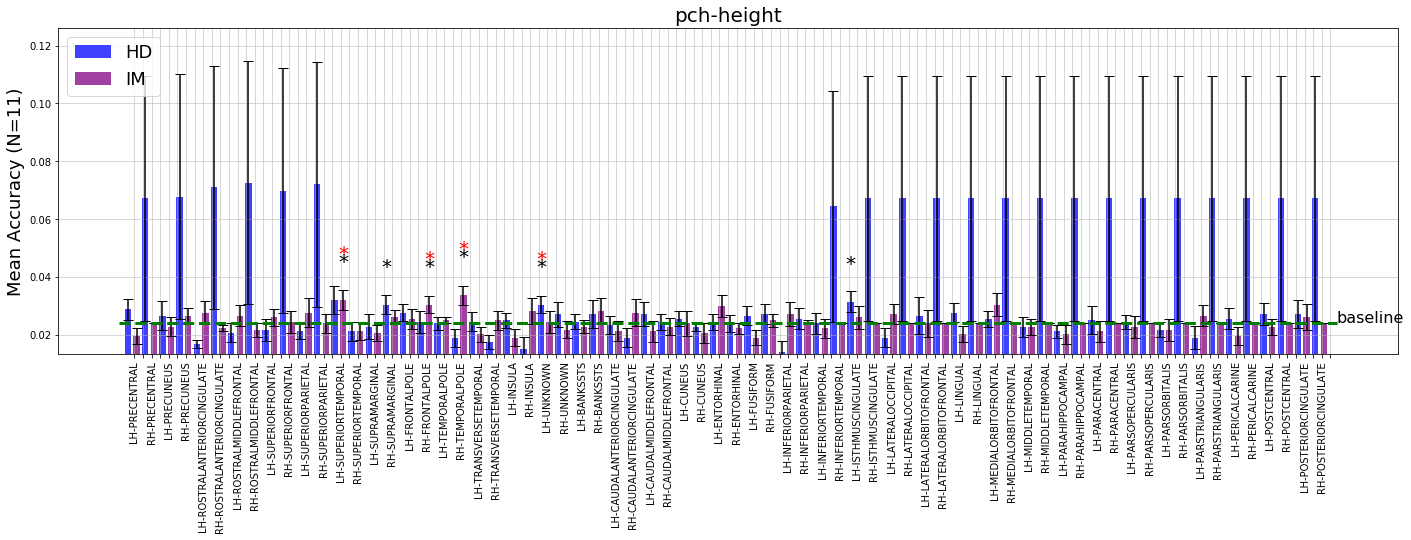

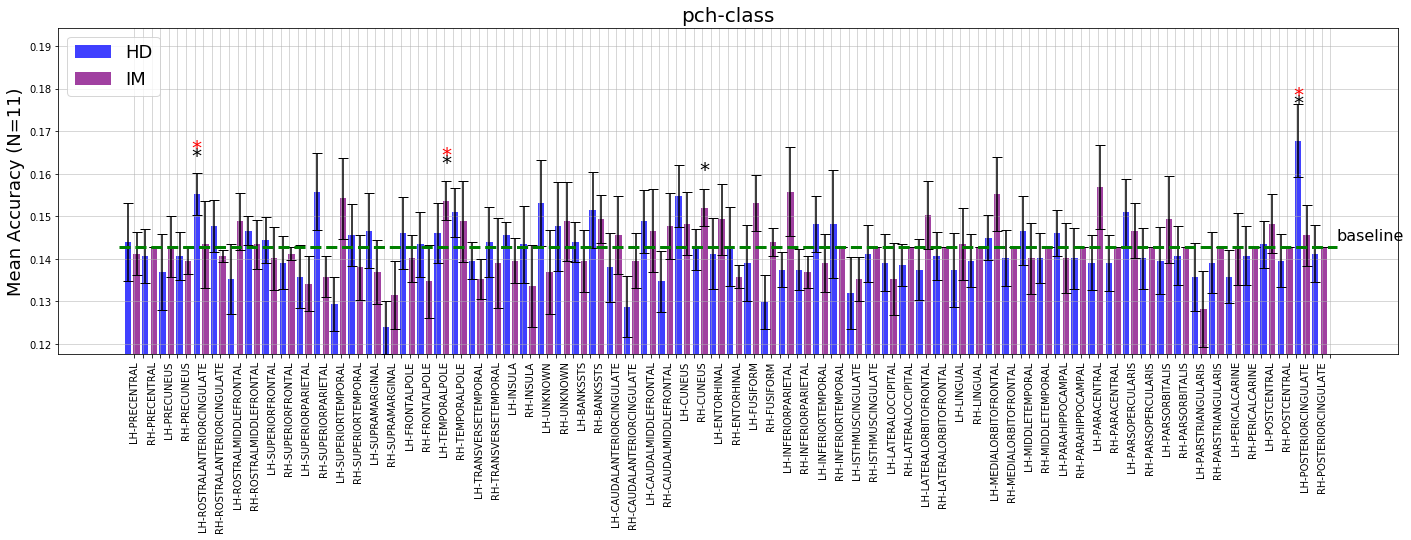

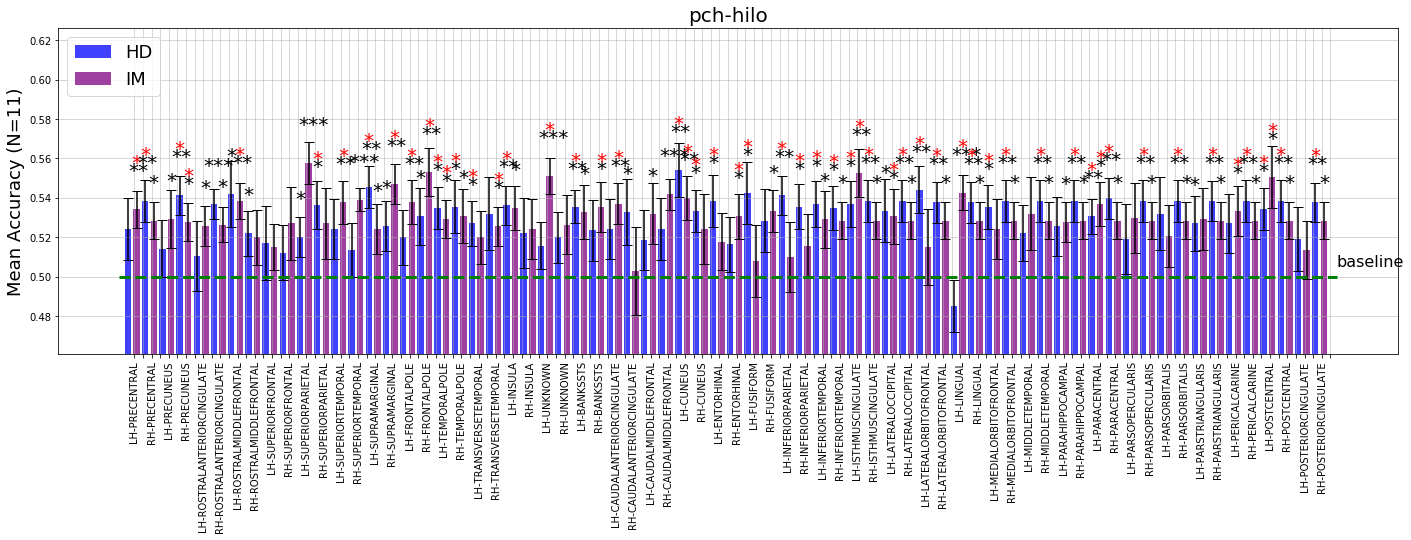

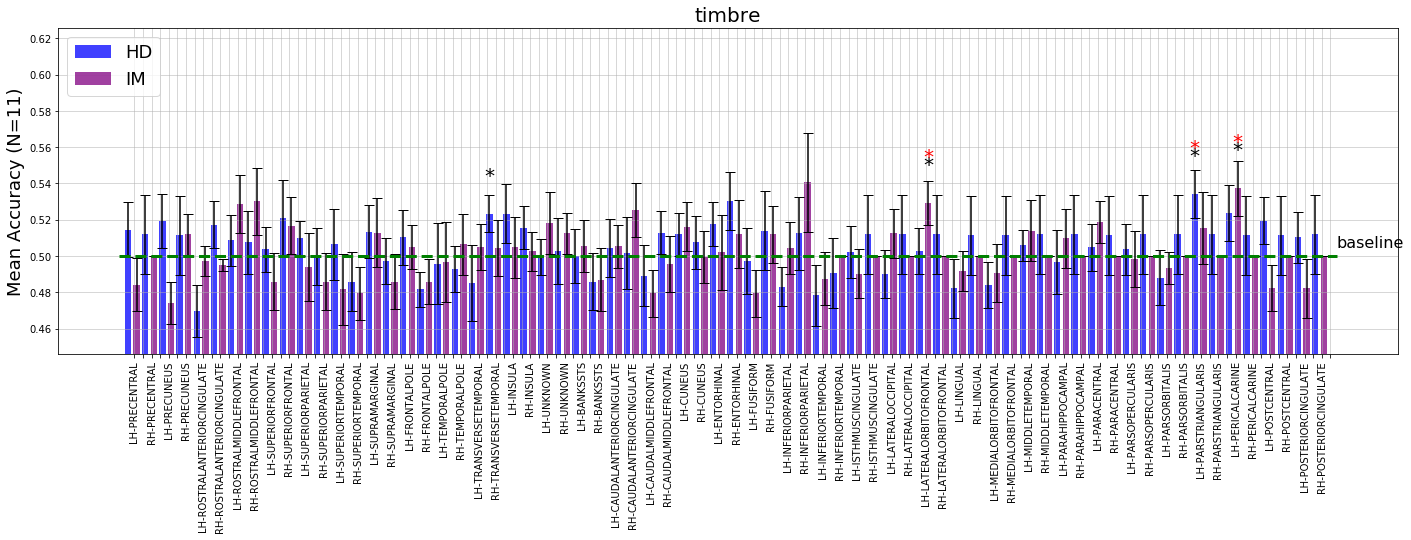

In [5]:
A.plot_group_results(group_res)

In [ ]:
# TODO: Plot individual subjects' results